# Your name: Kiejstut Bunikiewicz
## Assignment Name: CA01 - Data Cleaning and Exploration of India Air Quality

# Program Inititialization Section
## Enter your import packages here

In [86]:
# import packages 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import sklearn 
from sklearn.impute import SimpleImputer

# Data File Reading Section
## Write code to read in data from external sources here

In [87]:
#read datasets, Air Pollution Data - India
data = pd.read_csv('data.csv', encoding = 'ISO-8859-1', low_memory=False)
# I had to change the encoding, since the default encoding did not work

# Initial Data Investigation Section

## Summarized details
### Generate descriptive statistics that summarize the central tendency, dispersion, and shape of a dataset’s distribution, excluding NaN values.
#### Steps:
#### 1. Statistical Description of data (data.describe)
#### 2. Display number of total rows and columns of the dataset (data.shape)
#### 3. Display number of non-null values for each column (data.count)
#### 4. Display number of null values for each column (sum of data.isnull)
#### 5. Display range, column, number of non-null objects of each column, datatype and memory usage (data.info)
#### 6. Display Top 10 and Bottom 10 records (head and tail)

In [89]:
# 1. Statistical Description of data
data.describe # quite a few NaNs

#2. Display number of total rows and columns of the dataset
data.shape
# 13 Columns and  435,742 rows

#3. Display number of non-null values for each columns 
data.count

#4. Display number of null values for each column
data.isnull().sum() # high number of null in spm and pm2_5 columns, which could be a concern

#5. Display Range, Columns, Number of non-null objects of each column, datatype  and memory usage
data.info

#6. Display Top10 and Bottom10 Records
data.head(10) # Top 10, some NaN

data.tail(10) #Bottom 10, last 3 rows mostly NaN

#Other descriptive statistics for pollutants
#SO2 statistics
data.so2.mean()
data.so2.std()
data.so2.min()
data.so2.max()
data.so2.count()

#NO2 Statistics
data.no2.mean()
data.no2.std()
data.no2.min()
data.no2.max()
data.no2.count()

#RSPM Statistics
data.rspm.mean()
data.rspm.std()
data.rspm.min()
data.rspm.max()
data.rspm.count()

#SPM Statistics
data.spm.mean()
data.spm.std()
data.spm.min()
data.spm.max()
data.spm.count()

#PM2_5 Statistics
data.pm2_5.mean()
data.pm2_5.std()
data.pm2_5.min()
data.pm2_5.max()
data.pm2_5.count()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
435732,SAMP,09-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,22.0,50.0,145.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-09
435733,SAMP,12-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,34.0,61.0,161.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-12
435734,SAMP,15-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,20.0,44.0,148.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-15
435735,SAMP,18-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,17.0,44.0,131.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-18
435736,SAMP,21-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,18.0,45.0,140.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-21
435737,SAMP,24-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,22.0,50.0,143.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-24
435738,SAMP,29-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,20.0,46.0,171.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-29
435739,NaN,NaN,andaman-and-nicobar-islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435740,NaN,NaN,Lakshadweep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435741,NaN,NaN,Tripura,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Cleansing the dataset
### Dropping of less valued columns:
1. stn_code, agency, sampling_date, location_monitoring_agency do not add much value to the dataset in terms of information. Therefore, we can drop those columns.

2. Dropping rows where no date is available.

In [90]:
# Cleaning up the data

#dropping columns that aren't required, which are stn_code, agency, sampling_date, location_monitoring_station

data = data.drop(columns = ['stn_code','agency','sampling_date', 'location_monitoring_station'])
data.head() # head shows the columns were dropped

# dropping rows where no date is available

data.dropna(subset = ['date'], inplace = True) #dropped missing values from Date Column
data['date'].isnull().sum() # check shows 0 null values for date

0

In [91]:
# displaying final columns (data.columns)

data.columns # only the columns we want remain

Index(['state', 'location', 'type', 'so2', 'no2', 'rspm', 'spm', 'pm2_5',
       'date'],
      dtype='object')

### Changing the types to uniform format:

Notice that the ‘type’ column has values such as ‘Industrial Area’ and ‘Industrial Areas’ — both actually mean the same, so let’s remove such type of stuff and make it uniform. Replace the 'type' values with standard codes as follows:

types = {
    "Residential": "R",
    "Residential and others": "RO",
    "Residential, Rural and other Areas": "RRO",
    "Industrial Area": "I",
    "Industrial Areas": "I",
    "Industrial": "I",
    "Sensitive Area": "S",
    "Sensitive Areas": "S",
    "Sensitive": "S",
    np.nan: "RRO"
}

data.type = data.type.replace(types)

In [92]:
#First checking existing values
data.type.value_counts() #initial check of values

#Changing the Types
types = { "Residential": "R", "Residential and others": "RO", "Residential, Rural and other Areas": "RRO",
         "Industrial Area": "I", "Industrial Areas": "I", "Industrial": "I", "Sensitive Area": "S", "Sensitive Areas": "S",
         "Sensitive": "S", np.nan: "RRO" }
data.type = data.type.replace(types)

In [93]:
# Display top 10 records after codification of 'types'
data.head(10) #types have changed

,state,location,type,so2,no2,rspm,spm,pm2_5,date
0,Andhra Pradesh,Hyderabad,RRO,4.8,17.4,NaN,NaN,NaN,1990-02-01
1,Andhra Pradesh,Hyderabad,I,3.1,7.0,NaN,NaN,NaN,1990-02-01
2,Andhra Pradesh,Hyderabad,RRO,6.2,28.5,NaN,NaN,NaN,1990-02-01
3,Andhra Pradesh,Hyderabad,RRO,6.3,14.7,NaN,NaN,NaN,1990-03-01
4,Andhra Pradesh,Hyderabad,I,4.7,7.5,NaN,NaN,NaN,1990-03-01
5,Andhra Pradesh,Hyderabad,RRO,6.4,25.7,NaN,NaN,NaN,1990-03-01
6,Andhra Pradesh,Hyderabad,RRO,5.4,17.1,NaN,NaN,NaN,1990-04-01
7,Andhra Pradesh,Hyderabad,I,4.7,8.7,NaN,NaN,NaN,1990-04-01
8,Andhra Pradesh,Hyderabad,RRO,4.2,23.0,NaN,NaN,NaN,1990-04-01
9,Andhra Pradesh,Hyderabad,I,4.0,8.9,NaN,NaN,NaN,1990-05-01


### Creating a year column
To view the trend over a period of time, we need year values for each row and also when you see in most of the values in date column only has ‘year’ value. So, let’s create a new column holding year values. Convert the column to 'datetime' type and extract the year to populate the new column. Display Top 5 records after the conversion.

In [94]:
#Converting column to datetime
data['date'] # initial check, type is object
data['date'] = pd.to_datetime(data['date']) #Code converts to type datetime
data['date'] # conversion successful

data['year'] = pd.DatetimeIndex(data['date']).year #Creating a column that only has year values
data.head() #Year column successfully created

,state,location,type,so2,no2,rspm,spm,pm2_5,date,year
0,Andhra Pradesh,Hyderabad,RRO,4.8,17.4,NaN,NaN,NaN,1990-02-01,1990
1,Andhra Pradesh,Hyderabad,I,3.1,7.0,NaN,NaN,NaN,1990-02-01,1990
2,Andhra Pradesh,Hyderabad,RRO,6.2,28.5,NaN,NaN,NaN,1990-02-01,1990
3,Andhra Pradesh,Hyderabad,RRO,6.3,14.7,NaN,NaN,NaN,1990-03-01,1990
4,Andhra Pradesh,Hyderabad,I,4.7,7.5,NaN,NaN,NaN,1990-03-01,1990


### Handling Missing Values

The column such as SO2, NO2, rspm, spm, pm2_5 are the ones which contribute much to our analysis. So, we need to remove null from those columns to avoid inaccuracy in the prediction.
We use the Imputer from sklearn.preprocessing to fill the missing values in every column with the mean.

In [96]:
# define columns of importance, which shall be used reguarly (COLS = ....)
# invoke SimpleImputer to fill missing values using 'mean' as the replacement strategy
# Display data.info after the transformation
# Display that there are no more missing values in the dataset

COLS = data.loc[:,['so2', 'no2', 'rspm', 'spm' , 'pm2_5']] #important columns defined
imp = sklearn.impute.SimpleImputer(missing_values = np.nan, strategy = 'mean') #Set up Imputer to fill missing with mean
fitted = imp.fit(COLS) #ran fit
fitted = imp.transform(COLS) # ran transform
fitted = pd.DataFrame(fitted, columns= ['so2', 'no2', 'rspm', 'spm' , 'pm2_5']) #Output was an nparray, so I had to turn it back into a DataFrame
data[['so2', 'no2', 'rspm', 'spm' , 'pm2_5']] = fitted #Replaced the old columns with the columns that have no missing entries

data.head() #No missing numbers on the head

data.info #transformation successful

data.dropna(inplace=True) #had 4 missing entries lingering, so I dropped them
#possibly an indexing error from conversion from nparray to dataframe

data.isnull().sum() #no more missing values in dataset

data.tail()
#For some reason, tail was not replaced with mean
#Fixed with row drops


state       0
location    0
type        0
so2         0
no2         0
rspm        0
spm         0
pm2_5       0
date        0
year        0
dtype: int64

## Statewise Grouping of so2, no2, rspm, spm values

Calculate median values of so2, no2, rspm, spm for each state and display in (a) as table (b) bar chart, with values sorted in ascending order. Separate section for each of the component. Use matplotlib().

### so2 status

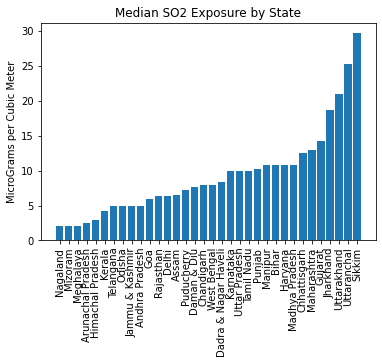

In [97]:
#SO2 Table
s02state = data[['so2','state']].groupby('state').median().sort_values(by = 'so2',ascending = True)
s02state.head() #table of sorted median amount of so2 grouped by state

#SO2 Bar Chart
s02state2 = data.groupby('state').so2.median().sort_values(ascending = True)
plt.bar(s02state2.index, s02state2)
plt.title("Median SO2 Exposure by State")
plt.ylabel("MicroGrams per Cubic Meter")
plt.xticks(rotation = 90)
plt.show()

#The three states with the highest exposure are Uttaranchal(25.3), Uttarakhand(21), and Jharkhand(18.7).
#The three states with the lowes exposure are Nagaland(2), Mizoram(2), and Meghalaya(2). All units are micrograms.
# The states with the lowest exposure have an exposure of less than 20% of the states with the highest.

### no2 status

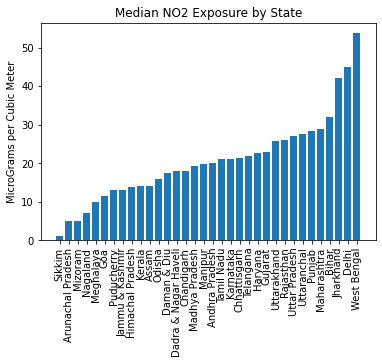

In [101]:
#NO2 Table
no2state = data[['no2','state']].groupby('state').median().sort_values(by = 'no2', ascending = True)
no2state.head() #table of sorted median amount of no2 grouped by state

#NO2 Bar Chart
no2state2 = data.groupby('state').no2.median().sort_values(ascending = True)
plt.bar(no2state2.index,no2state2)
plt.title("Median NO2 Exposure by State")
plt.ylabel("MicroGrams per Cubic Meter")
plt.xticks(rotation = 90)
plt.show()

#West Bengal(53.7), Delhi(45), and Jharkhand(42) have the highest exposure. 
#Sikkim(0.9), Arunachal Pradesh(5), and Mizoram(5) have the lowest exposure. All units are in micrograms.
# The lowest exposure states have and exposure of less than 10% of the highest states.

### rspm status

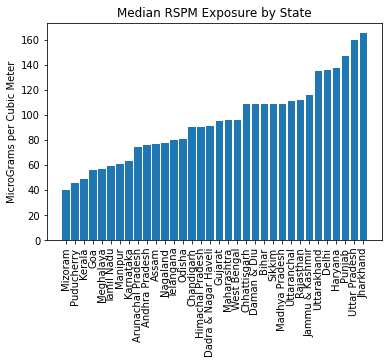

In [102]:
#RSPM Table
rspmstate = data[['rspm','state']].groupby('state').median().sort_values(by='rspm', ascending = True)
rspmstate.head() #table of sorted median amount of rspm grouped by state

#RSPM Bar Chart
rspmstate2 = data.groupby('state').rspm.median().sort_values(ascending = True)
plt.bar(rspmstate2.index,rspmstate2)
plt.title("Median RSPM Exposure by State")
plt.ylabel("MicroGrams per Cubic Meter")
plt.xticks(rotation = 90)
plt.show()

#Jharkhand(165), Uttar Pradesh(160), and Punjab(147) have the highest exposure rates.
#Mizoram(40), Puducherry(46), and Kerala(49) have the lowest exposure rates. 
#The lowest exposed states have an exposure amount between 25% and 30% of the most exposed.
# This variation is less than the prior two categories of pollution, but also the second most common pollutant by volume.

### spm status

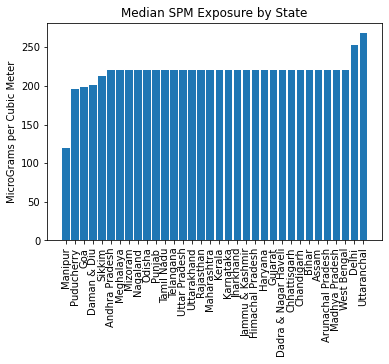

In [103]:
#SPM Table
spmstate = data[['spm', 'state']].groupby('state').median().sort_values(by = 'spm', ascending = True)
spmstate.head() #table of sorted median amount of spm grouped by state

#SPM Bar Chart
spmstate2 = data.groupby('state').spm.median().sort_values(ascending = True)
plt.bar(spmstate2.index,spmstate2)
plt.title("Median SPM Exposure by State")
plt.ylabel("MicroGrams per Cubic Meter")
plt.xticks(rotation = 90)
plt.show()

#The distribution of SPM is much more uniform by state. Uttarancchal(264) and Delhi(253) are the most exposed.
#Manipur(114) and Sikkim(143) are the least exposed. However, most states are at approximately the same level of exposure.
#All units are micrograms. This is the most common pollutant by volume and possibly the biggest threat to Indian air quality. 

### What is the yearly trend in a particular state, say ‘Andhra Pradesh’?

Create a new dataframe containing the NO2, SO2, rspm, and spm data regarding state ‘Andhra Pradesh’ only and group it by ‘year’. Display top 5 records after.

In [104]:
#Creating a dataframe of only 'Andhra Pradesh'
andrhap_data = data[data.state == 'Andhra Pradesh']
andrhap_data.head() # Successfully Filtered for single state
yearly_ap_exposure = andrhap_data[['year', 'so2', 'no2', 'rspm', 'spm']].groupby('year').median() #data grouped by year and median of pollution
yearly_ap_exposure.head(5) # the top 5 records are the 5 earliest year entries

,so2,no2,rspm,spm
year,,,,
1990,5.60,13.6,108.833091,179.00000
1991,8.25,12.8,108.833091,141.50000
1992,12.40,27.6,108.833091,192.00000
1993,6.00,11.4,108.833091,220.78348
1994,8.70,14.2,108.833091,220.78348


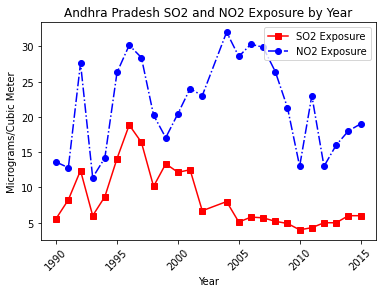

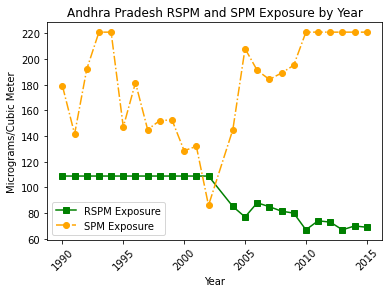

In [105]:
# Display yearly trend graph (year vs. value) in pairs: (a) so2 and no2 (b) rspm and spm. 
# So, you will display TWO graphs altogether.

#Trend Graph for so2 and no2
plt.plot(yearly_ap_exposure.so2, marker = 's', c='r',ls = '-', label="SO2 Exposure") # set up axes for graphs
plt.plot(yearly_ap_exposure.no2, marker = 'o', c='b',ls = '-.', label="NO2 Exposure")
plt.ylabel("Micrograms/Cubic Meter")
plt.title("Andhra Pradesh SO2 and NO2 Exposure by Year")
plt.xlabel('Year')
plt.xticks(rotation = 45)
plt.legend()
plt.show()

#Trend Graph for RSPM and SPM
plt.plot(yearly_ap_exposure.rspm, marker = 's', c='g',ls = '-', label="RSPM Exposure") #set up axes for graphs
plt.plot(yearly_ap_exposure.spm, marker = 'o', c='orange',ls = '-.', label="SPM Exposure")
plt.ylabel("Micrograms/Cubic Meter")
plt.title("Andhra Pradesh RSPM and SPM Exposure by Year")
plt.xlabel('Year')
plt.xticks(rotation = 45)
plt.legend()
plt.show()

Do you find anythumg alarming? Explain what you can conclude from this Exploratory Data Analysis for the State of Andhra Pradesh. Enter your answer here .....



The most alarming information from the Exploratory Data Analysis of the State of Andhra Pradesh is the alarming reversal of a trend for three of the four pollutants observed. Although the pollution levels were decreasing until the mid-2000s for all four of the pollutants, all except RSPM have increased since 2010. This indicates there is a new trend of increasing pollution in India. For SPM specifically, we can see that the levels of exposure are at the highest point since recording began. 

However, not everything is lost. The SO2 levels and NO2 levels are still much lower than their all time peaks and the problem can be potentially nipped in the bud. SPM is the most common air pollutant and can be the biggest threat to air quality.

If Andhra Pradesh is an indicator for the rest of India, the trend increasing air pollution levels in the past decade means that most of the country can suffer from a worsening air quality and the health issues that come with it. 